## CMPE 462 HOMEWORK 1
Due Date: 21.03.2019

In [2]:
# Allowed libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
# For loading data, you can import other libraries, but further usage is not allowed.

### 1.) Review bias/variance dilemma.
Replicate the bias-variance-plot (bias,
variance and error vs. model complexity) given in Figure 4.6 in the textbook
or in lecture notes [W04.pdf, pg.52]. For this:

* Generate 20 values {$x^t$} from the range [0, 5] from uniform distribution.  
* Generate 100 different samples $X_s$. Each sample contains 20 instances {$x^t, y^t_s$} where $y^t_s = f(x^t) + \epsilon$, $f(x) =2× sin(1.5 × x)$, and $ \epsilon ∼ N (0, 1)$.
* For each sample, fit polynomial models of order 1,3, and 5.
* Plot bias, variance and error of these models.

Biases of fits order[1,3,5]    :	 [1.6105211524055372, 1.1077662978525511, 0.99503789546621435]
Variances of fits order[1,3,5] :	 [0.083377766596206382, 0.17158227458025346, 0.26313227916547344]
Errors of of fits order[1,3,5] :	 [2.677156148941866, 1.3987284452382005, 1.2532326925793065]


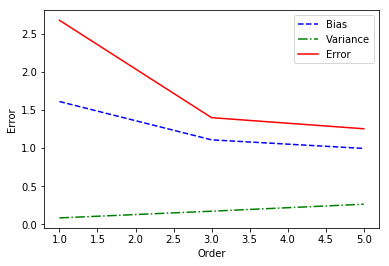

In [21]:
# Solution Here
# Generate 100 different samples.
SIZE = 20
SAMPLE_COUNT = 100

def polyfit(x,r,order):
    D = []
    for cur_x in x:
        inter_l = []
        for i in range(0,order+1):
            inter_l.append(cur_x**i)
        D.append(inter_l)
    
    r = np.array(r).T
    D = np.array(D)
    first_part = np.linalg.inv(np.matmul(D.T,D))
    second_part = np.matmul(first_part,D.T)
    w = np.matmul(second_part,r)
    return w

def calc_y(x):
    return 2 * np.sin(1.5 * x)

# g_mean is the order 1 means of lists of lists order_1_fits.
def calc_bias(g_mean,r):
    # Convert the lists to np arrays for convenience  
    r = np.array(r)
    g_mean = np.array(g_mean)
    
    bias_square = np.mean((g_mean - r)**2)
    return np.sqrt(bias_square)

# g is the order 1/3/5 (only one of them) fit lists of list.
def calc_variance(g,g_mean):
    g_mean = np.array(g_mean)
    g_mean = np.tile(g_mean,(SAMPLE_COUNT,1))
    
    difference = g-g_mean
    return np.mean(difference**2)

def calc_g_mean(g):
    g = np.array(g)
    return np.mean(g, axis=0) 
    
def calc_error(var,bias):
    return bias**2 + var
    
def fit(x,r,order):
    # I have implemented the polyfit myself, however I will use polyval for getting the polynom
    coeffs = polyfit(x,r,order)
    return np.polyval(np.flip(coeffs,axis=0),x)

# Generate 20 values
x_values = np.random.uniform(low=0,high=5,size=SIZE)
r_values_list = []

order_1_fits = []
order_3_fits = []
order_5_fits = []


# Generate the samples
# For each sample fit a polynomial model of order 1,3,5

for i in range(SAMPLE_COUNT):
    sample = calc_y(x_values) + np.random.normal(loc=0,scale=1,size=SIZE)
    r_values_list.append(sample)
    
    fit_1 = fit(x_values,r_values_list[i],1)
    order_1_fits.append(fit_1)
    
    fit_3 = fit(x_values,r_values_list[i],3)
    order_3_fits.append(fit_3)
    
    fit_5 = fit(x_values,r_values_list[i],5)
    order_5_fits.append(fit_5)
    
r_values_list = np.array(r_values_list)

order_1_fits = np.array(order_1_fits)
order_3_fits = np.array(order_3_fits)
order_5_fits = np.array(order_5_fits)

orders = [1,3,5]

order_1_g_mean = calc_g_mean(order_1_fits)
order_3_g_mean = calc_g_mean(order_3_fits)
order_5_g_mean = calc_g_mean(order_5_fits)

order_fit_means = [order_1_g_mean,order_3_g_mean,order_5_g_mean]

# Calculate the biases for all orders
bias_order_1 = calc_bias(order_1_g_mean,r_values_list)
bias_order_3 = calc_bias(order_3_g_mean,r_values_list)
bias_order_5 = calc_bias(order_5_g_mean,r_values_list)
biases = [bias_order_1,bias_order_3,bias_order_5]


print("Biases of fits order[1,3,5]    :\t", biases)

# Calculate the variances for all orders
variance_order_1 = calc_variance(order_1_fits,order_1_g_mean)
variance_order_3 = calc_variance(order_3_fits,order_3_g_mean)
variance_order_5 = calc_variance(order_5_fits,order_5_g_mean)
variances = [variance_order_1,variance_order_3,variance_order_5]

print("Variances of fits order[1,3,5] :\t", variances)

# Calculate the errors for all orders
error_order_1 = calc_error(variance_order_1,bias_order_1)
error_order_3 = calc_error(variance_order_3,bias_order_3)
error_order_5 = calc_error(variance_order_5,bias_order_5)
errors = [error_order_1,error_order_3,error_order_5]

print("Errors of of fits order[1,3,5] :\t", errors)

# Plot the error/bias/variances of fits
plt.ylabel('Error')
plt.xlabel('Order')
plt.plot(orders,biases,'b--',label='Bias')
plt.plot(orders,variances,'g-.',label='Variance')
plt.plot(orders,errors,'r-',label='Error')
plt.legend()
plt.show()

In [18]:
# GOOD 
# This is the exact information I needed

matrix = [[1,4,3],[2,6,3],[3,5,3]]
matrix = np.array(matrix)
matrix_mean = np.mean(matrix, axis=0) 
matrix_mean

array([ 2.,  5.,  3.])

In [32]:
# EXACT THING I NEED WHEN PUTTING SAME MEAN TO EVERY ROW WHEN CALCULATING VAR
row = [1,2,3]
row = np.array(row)

x = np.tile(row,(3,1))
x

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

### 2.) Review cross-validation.
Replicate the cross-validation error plot (training and validation error vs. model complexity plot) given in Figure 4.7 in the textbook or in lecture notes [W04.pdf, pg52]. For this:
* Generate 10 samples containing 100 instances as in part 1.
* Split each sample to training and validation sets, fit polynomial models of order 1,3, and 5.
* Plot mean training and validation error (mean square error) of each model.

In [26]:
# Solution Here
SIZE = 100
SAMPLE_COUNT = 10
TRAINING_SPLIT_RATIO = 0.8

x_values = np.random.uniform(low=0,high=5,size=SIZE)
r_values_list = []


# Shape of x_values: (100,)
# Shape of r_values_list (10,100)
def split_data(x_values,r_values_list):
    

# Generate the samples
# For each sample fit a polynomial model of order 1,3,5
for i in range(SAMPLE_COUNT):
    sample = calc_y(x_values) + np.random.normal(loc=0,scale=1,size=SIZE)
    r_values_list.append(sample)

x_values_length = len(x_values)
training_length = int(TRAINING_SPLIT_RATIO*x_values_length)

training_x = x_values[:training_length]
test_x = x_values[training_length:]

# Split method
training_r_values = 

# For checking if the split was good
print(len(x_values),x_values)
print(len(training_x),training_x)
print(len(test_x),test_x)

100 [ 4.74297882  4.0321037   3.6244952   2.24166633  1.42056437  2.10700505
  2.28334806  3.94878282  3.2738156   3.13401656  2.14818331  4.64950489
  1.43442212  3.91909521  3.15875346  0.74508297  2.48116619  1.2126652
  4.29399921  0.16014288  4.83488363  1.21063561  2.27592398  2.01334679
  2.47139394  3.12961707  2.5026968   4.99900033  0.8370581   0.93734691
  4.14990456  2.66142634  4.87519388  0.2919587   3.64792     0.4798279
  0.5191403   2.59805616  2.33220678  4.44317606  3.51316588  2.52439455
  2.27420171  3.29432999  1.47436765  1.63752698  0.7186667   0.75893438
  3.69396708  2.27769141  1.21014849  4.6009308   3.94014176  4.854882
  0.06032562  0.27521123  4.84691823  1.43195146  4.33385108  2.44301612
  3.52577563  3.16374163  4.9794331   2.68784182  2.01201601  3.36646032
  3.09352754  3.087475    4.76691899  3.40897689  3.65217013  2.96998775
  0.16879286  2.13810701  1.34047618  3.98329608  3.34899067  2.54116059
  2.09511146  1.13156374  1.99913663  3.59037228  1

### 3.) Use of real dataset. 
Download Iris Data Set from UCI Machine Learning Repository. Randomly split it into training and test sets.
* For each feature, plot histogram of classes. For better visualiziation, plot classes in same plot but with different colors. (For this you can use plt.subplots)
* Consider only two classes: Iris Setosa and Iris Versicolour.
* Assuming Gaussian distribution, apply parametric classification, and find which particular feature (sepal length, sepal width, petal length, petal width) is most successful in classifying instances.
    - For this, treat each feature separately. find maximum likelihood estimate of the parameters $(μ, σ^2)$ of different classes using training set. (You can use plt.errorbar for visualization, use one column for each feature and visualize both classes in same plot using different colors).
    - Using these parameters, predict the classes of the instances in the test set, and calculate the error.

In [11]:
# Solution Here
iris = datasets.load_iris()
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
